In [70]:
import pandas as pd
import numpy as np 

In [71]:
np.random.seed(1)

np_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(np_samples*class_0_ratio)
no_class_1 = 100

In [72]:
no_class_0, no_class_1

(900, 100)

In [73]:
class_0 = {'feature1' : np.random.normal(0,1, no_class_0),
           'feature2' : np.random.normal(0,1, no_class_0),
           'target' : [0]*no_class_0}

In [74]:
class_0 = pd.DataFrame(class_0)

In [75]:
class_0

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [76]:
class_1 = pd.DataFrame({'feature1' : np.random.normal(3,1, no_class_1),
           'feature2' : np.random.normal(3,1, no_class_1),
           'target' : [1]*no_class_1})

In [77]:
class_1

,feature1,feature2,target
0,1.692029,3.933630,1
1,4.472396,1.236225,1
2,3.074876,2.589783,1
3,1.213065,2.546333,1
4,3.165211,2.410570,1
...,...,...,...
95,3.213026,3.188583,1
96,2.195458,3.560918,1
97,2.353418,2.078341,1
98,4.138173,3.647375,1


In [78]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [79]:
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [80]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [81]:
#up sampling 

df_minority= df[df.target == 1]
df_majority = df[df.target == 0]

In [82]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [83]:
from sklearn.utils import resample 
df_minority_upsampled = resample (df_minority, replace = True, n_samples = len(df_majority))

In [84]:
df_minority_upsampled

,feature1,feature2,target
961,2.827161,1.667695,1
929,3.033064,2.628968,1
944,3.387921,3.300051,1
996,2.195458,3.560918,1
966,2.034045,3.088036,1
...,...,...,...
990,2.970064,2.569230,1
986,4.491897,1.929712,1
918,4.425942,2.774580,1
909,1.724886,1.748043,1


In [85]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [86]:
df_upsampled

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
990,2.970064,2.569230,1
986,4.491897,1.929712,1
918,4.425942,2.774580,1
909,1.724886,1.748043,1


In [87]:
#no downsampling
df_majority_downsample = resample(df_majority, replace = False, n_samples = len(df_minority), random_state= 1 )

In [88]:
df_majority_downsample

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [89]:
df_downsampled = pd.concat([df_majority_downsample, df_minority])

In [90]:
df_downsampled.target.value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [91]:
#SMOTE
from sklearn.datasets import make_classification

In [92]:
X, y = make_classification(n_samples=1000, n_redundant = 0, n_features = 2, n_clusters_per_class = 1, weights = [0.90])

In [93]:
X

array([[-0.61212066,  1.57999205],
       [ 0.14971151, -0.02877929],
       [-0.37789943,  0.7944008 ],
       ...,
       [-1.29584647,  0.13293852],
       [-0.94169029,  0.5490333 ],
       [-0.49766468,  0.65496759]])

In [94]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [95]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])

final_df = pd.concat([df1,df2], axis =1)

In [96]:
final_df

,f1,f2,target
0,-0.612121,1.579992,0
1,0.149712,-0.028779,0
2,-0.377899,0.794401,0
3,-0.711326,0.560354,0
4,-1.481766,1.512872,0
...,...,...,...
995,-1.005736,0.788515,0
996,-2.269091,1.762625,0
997,-1.295846,0.132939,1
998,-0.941690,0.549033,0


In [97]:
final_df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [98]:
import matplotlib.pyplot as plt 

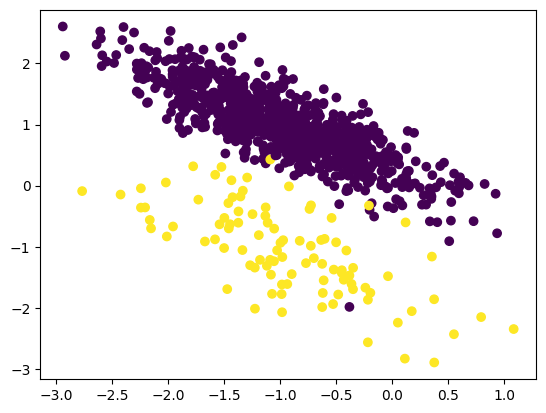

In [99]:
plt.scatter(final_df['f1'], final_df ['f2'], c = final_df['target'])

In [100]:
#smote
!pip install imblearn

In [101]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

In [102]:
X, y = oversample.fit_resample(final_df [['f1','f2']], final_df['target'])

In [103]:
X.shape

(1800, 2)

In [104]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])

final_df = pd.concat([df1,df2], axis =1)

In [105]:
final_df 

,f1,f2,target
0,-0.612121,1.579992,0
1,0.149712,-0.028779,0
2,-0.377899,0.794401,0
3,-0.711326,0.560354,0
4,-1.481766,1.512872,0
...,...,...,...
1795,-0.175729,-2.511819,1
1796,-1.573291,-0.821856,1
1797,-0.990619,-0.920844,1
1798,0.350492,-1.884955,1


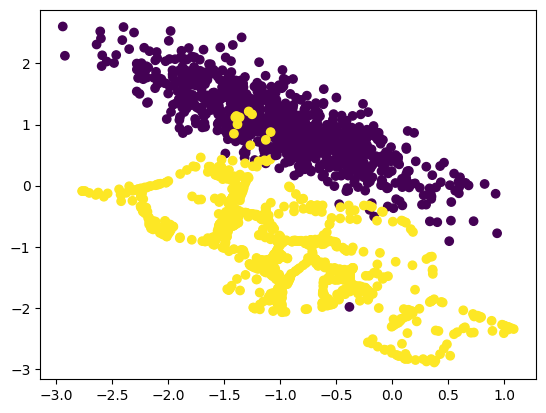

In [106]:
plt.scatter(final_df['f1'], final_df ['f2'], c = final_df['target'])